In [82]:
import pandas as pd

df_credits = pd.read_csv('./data/credits.csv')
df_titles = pd.read_csv('./data/titles.csv', index_col='id')

df_titles.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


<Axes: >

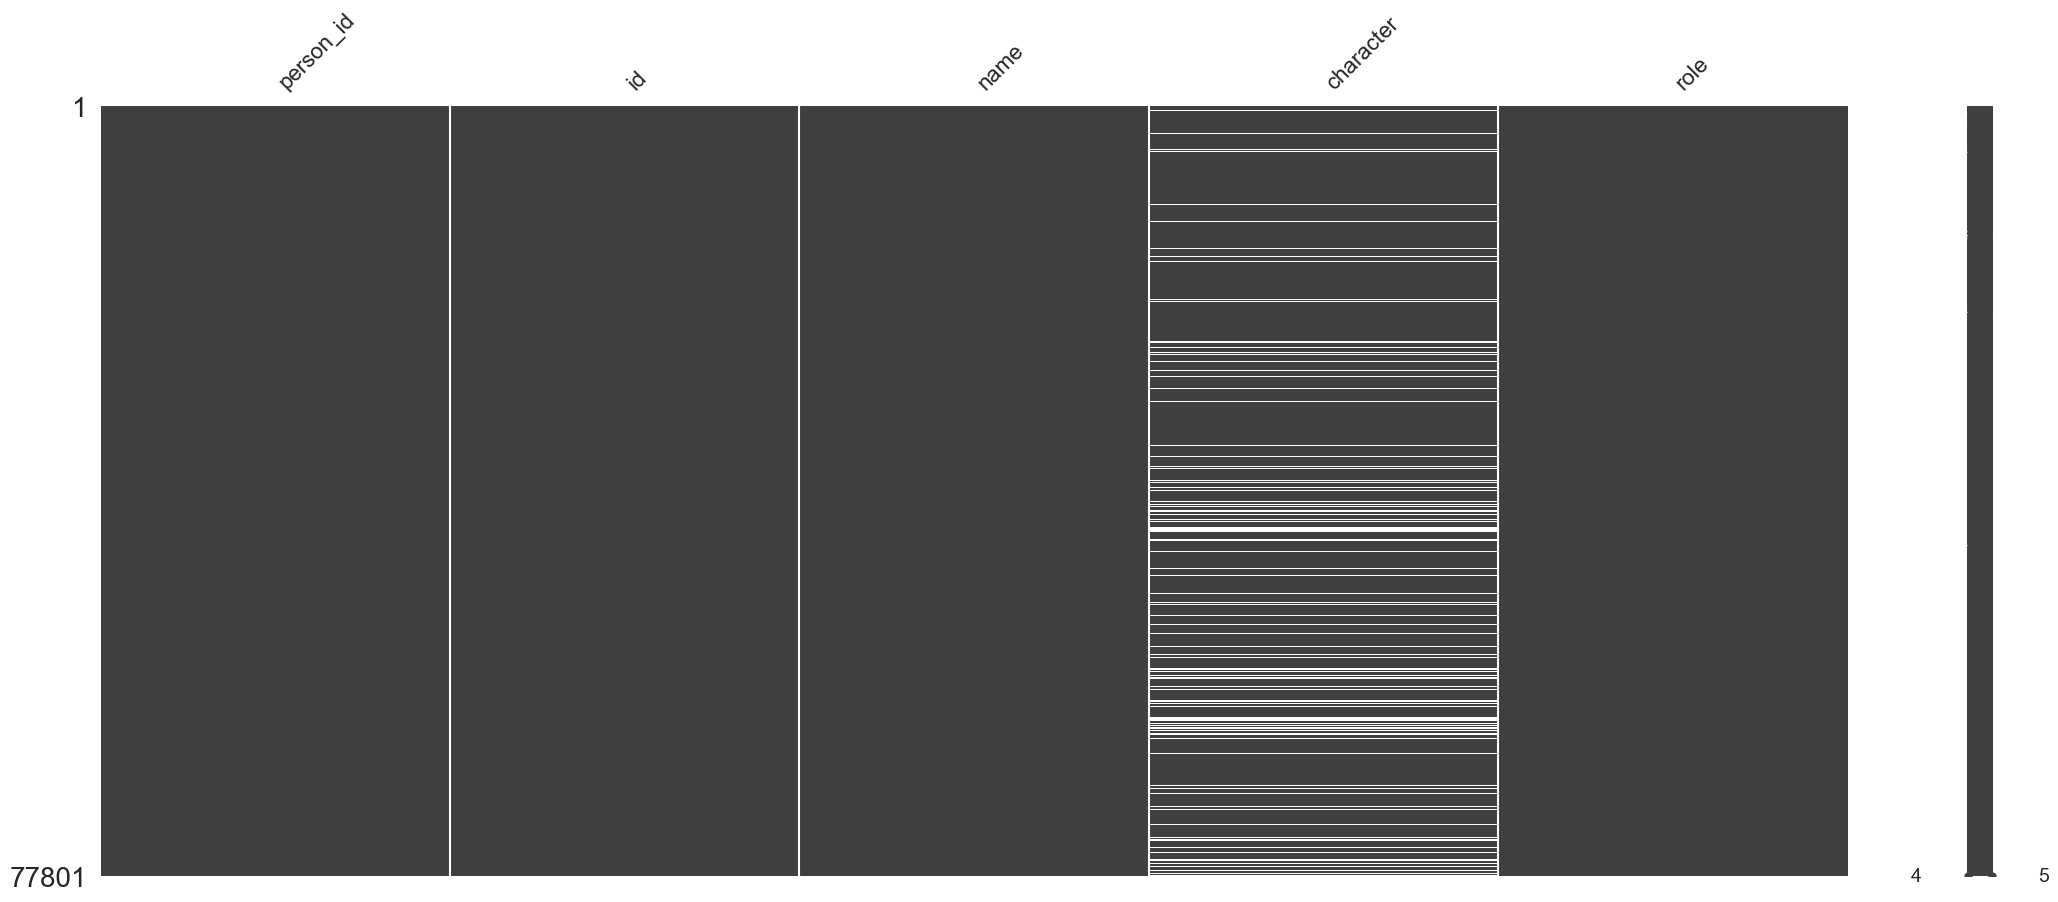

In [83]:
import missingno as msno

msno.matrix(df_credits)

<Axes: >

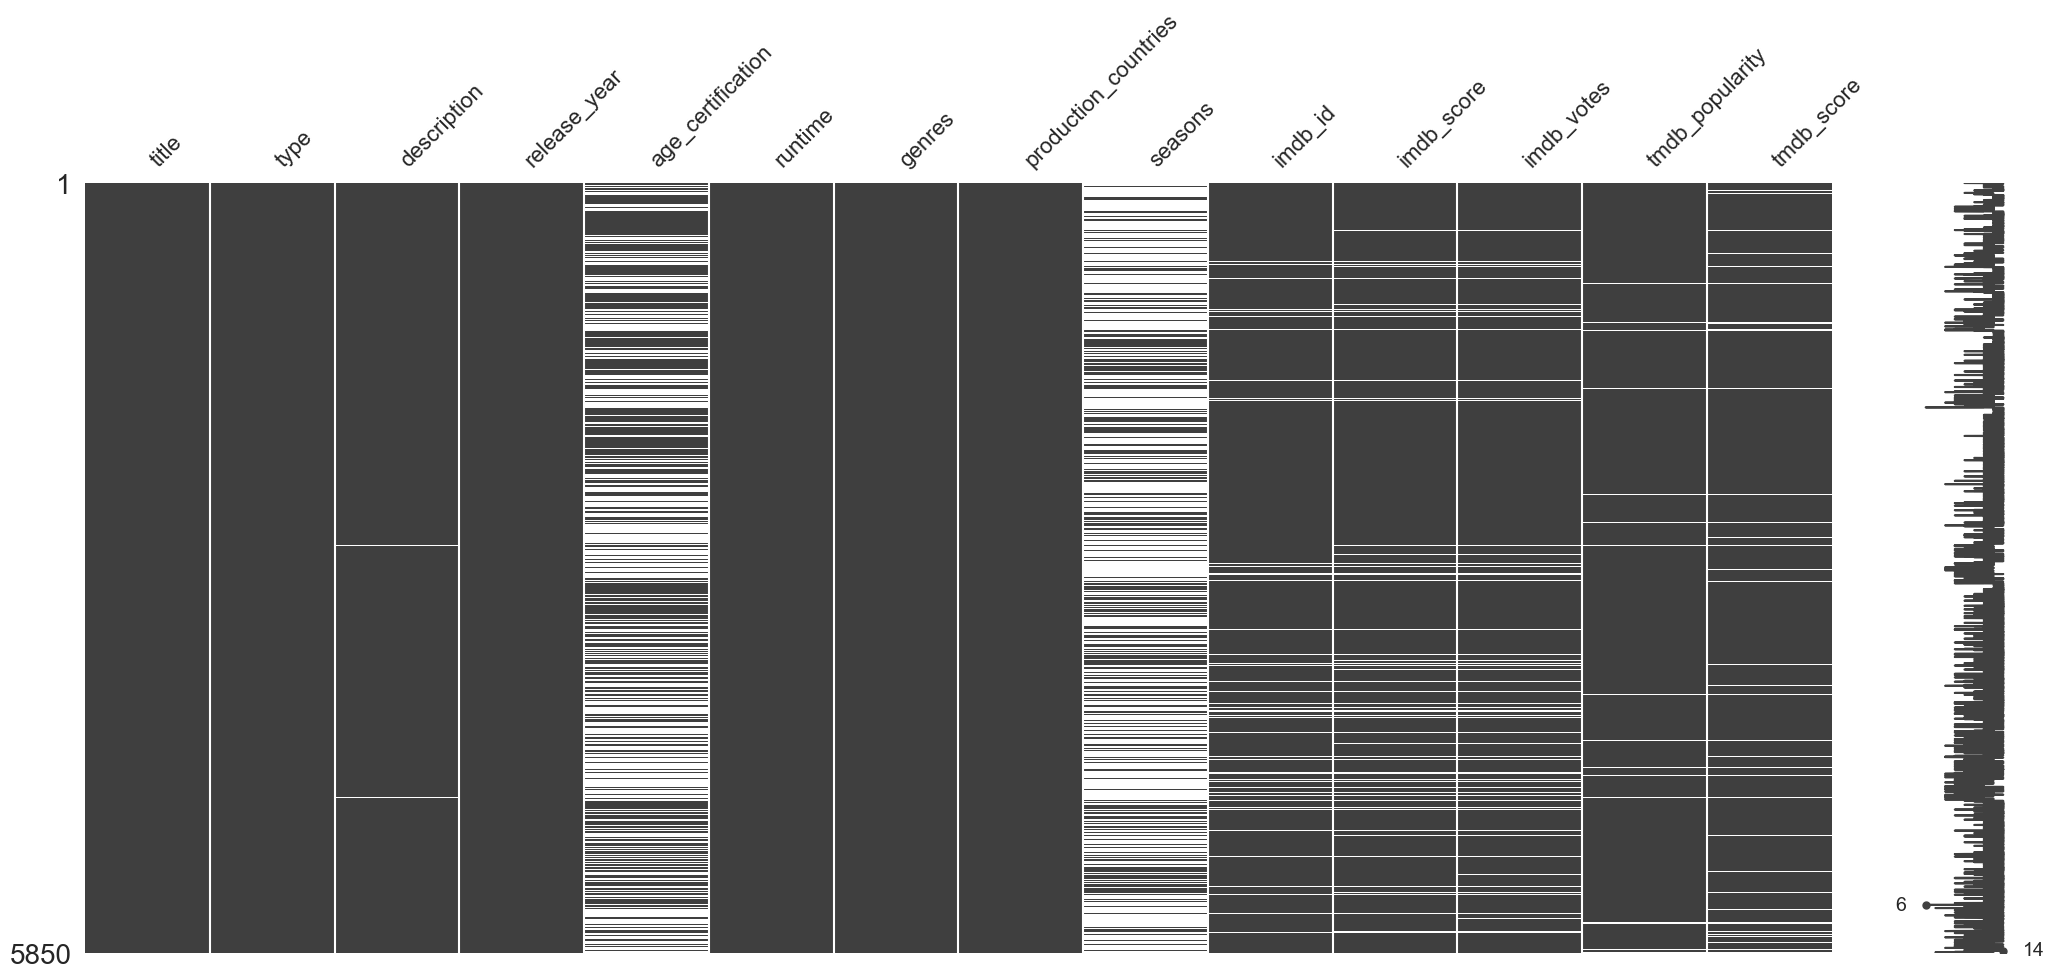

In [84]:
msno.matrix(df_titles)

In [85]:
df_titles.isnull().sum()

title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

<Axes: >

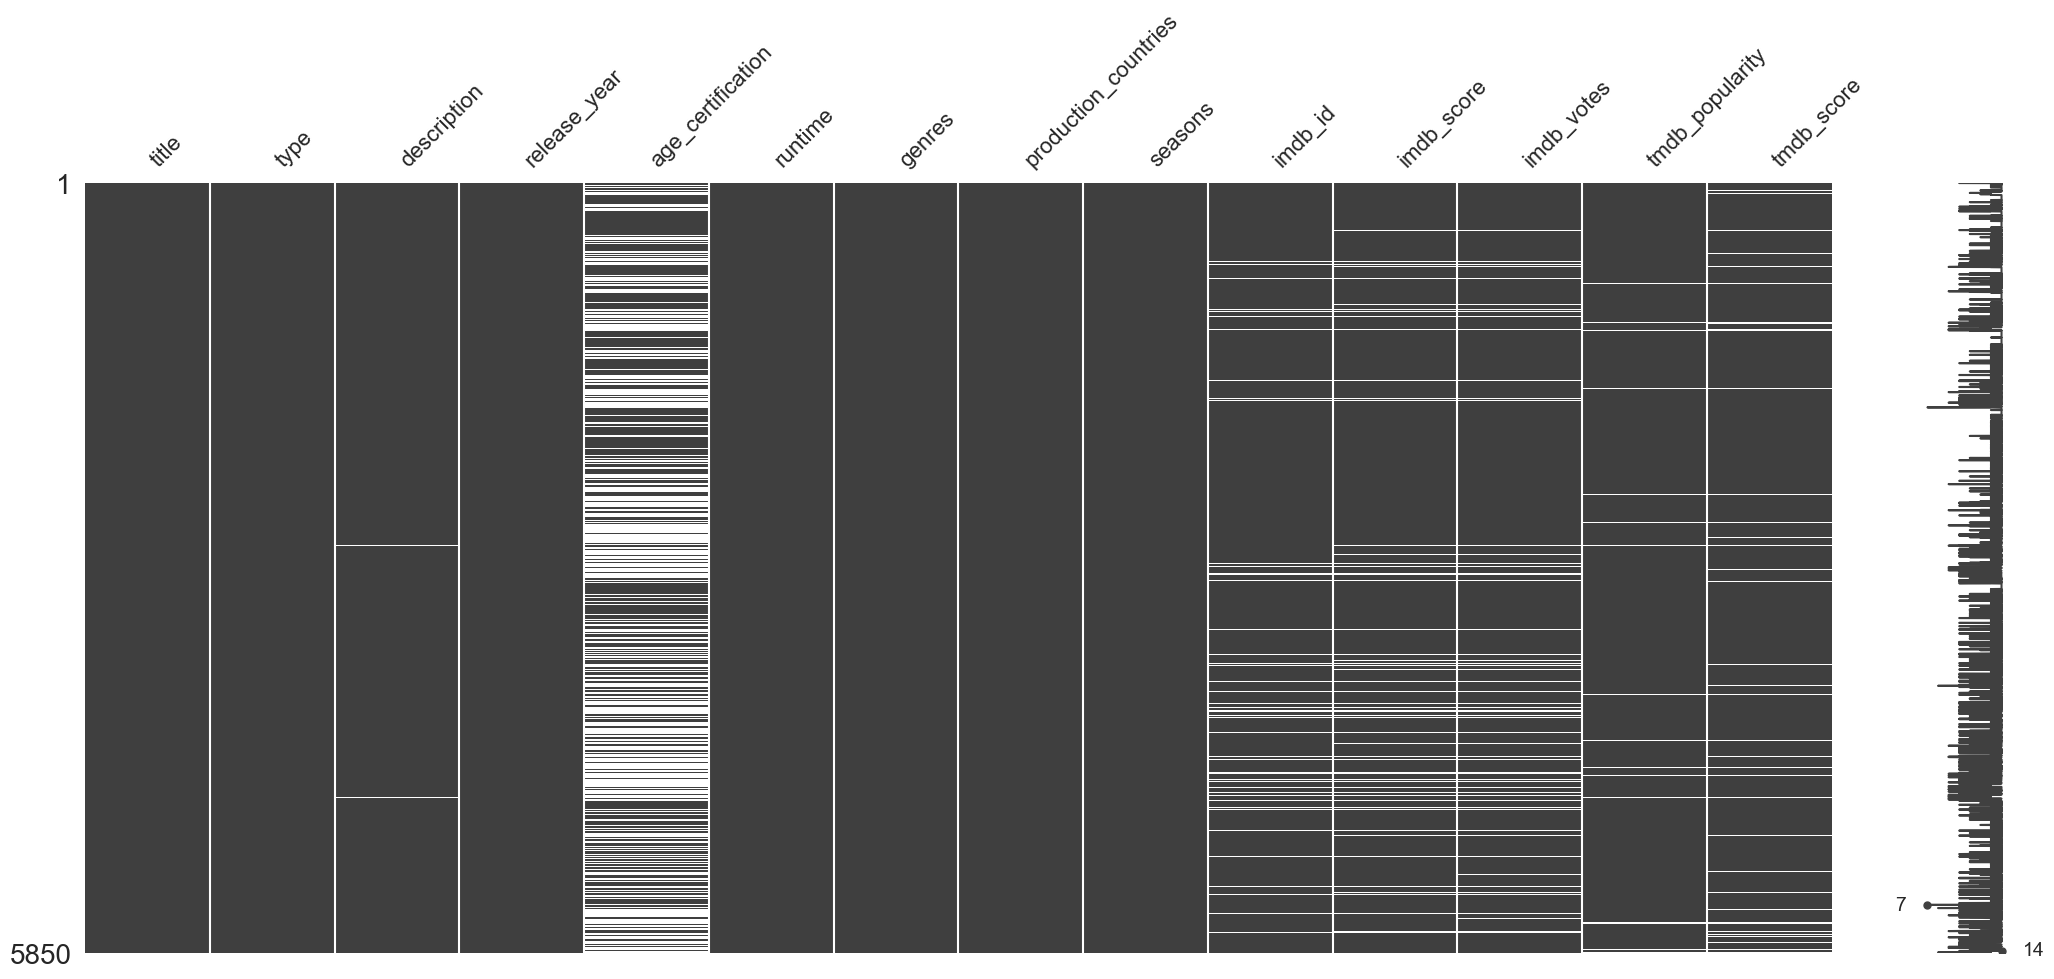

In [86]:
# Replace null values for seasons with 0
if (df_titles['seasons'].isnull().sum() > 0):
    df_titles['seasons'].fillna(0, inplace=True)


msno.matrix(df_titles)

<Axes: >

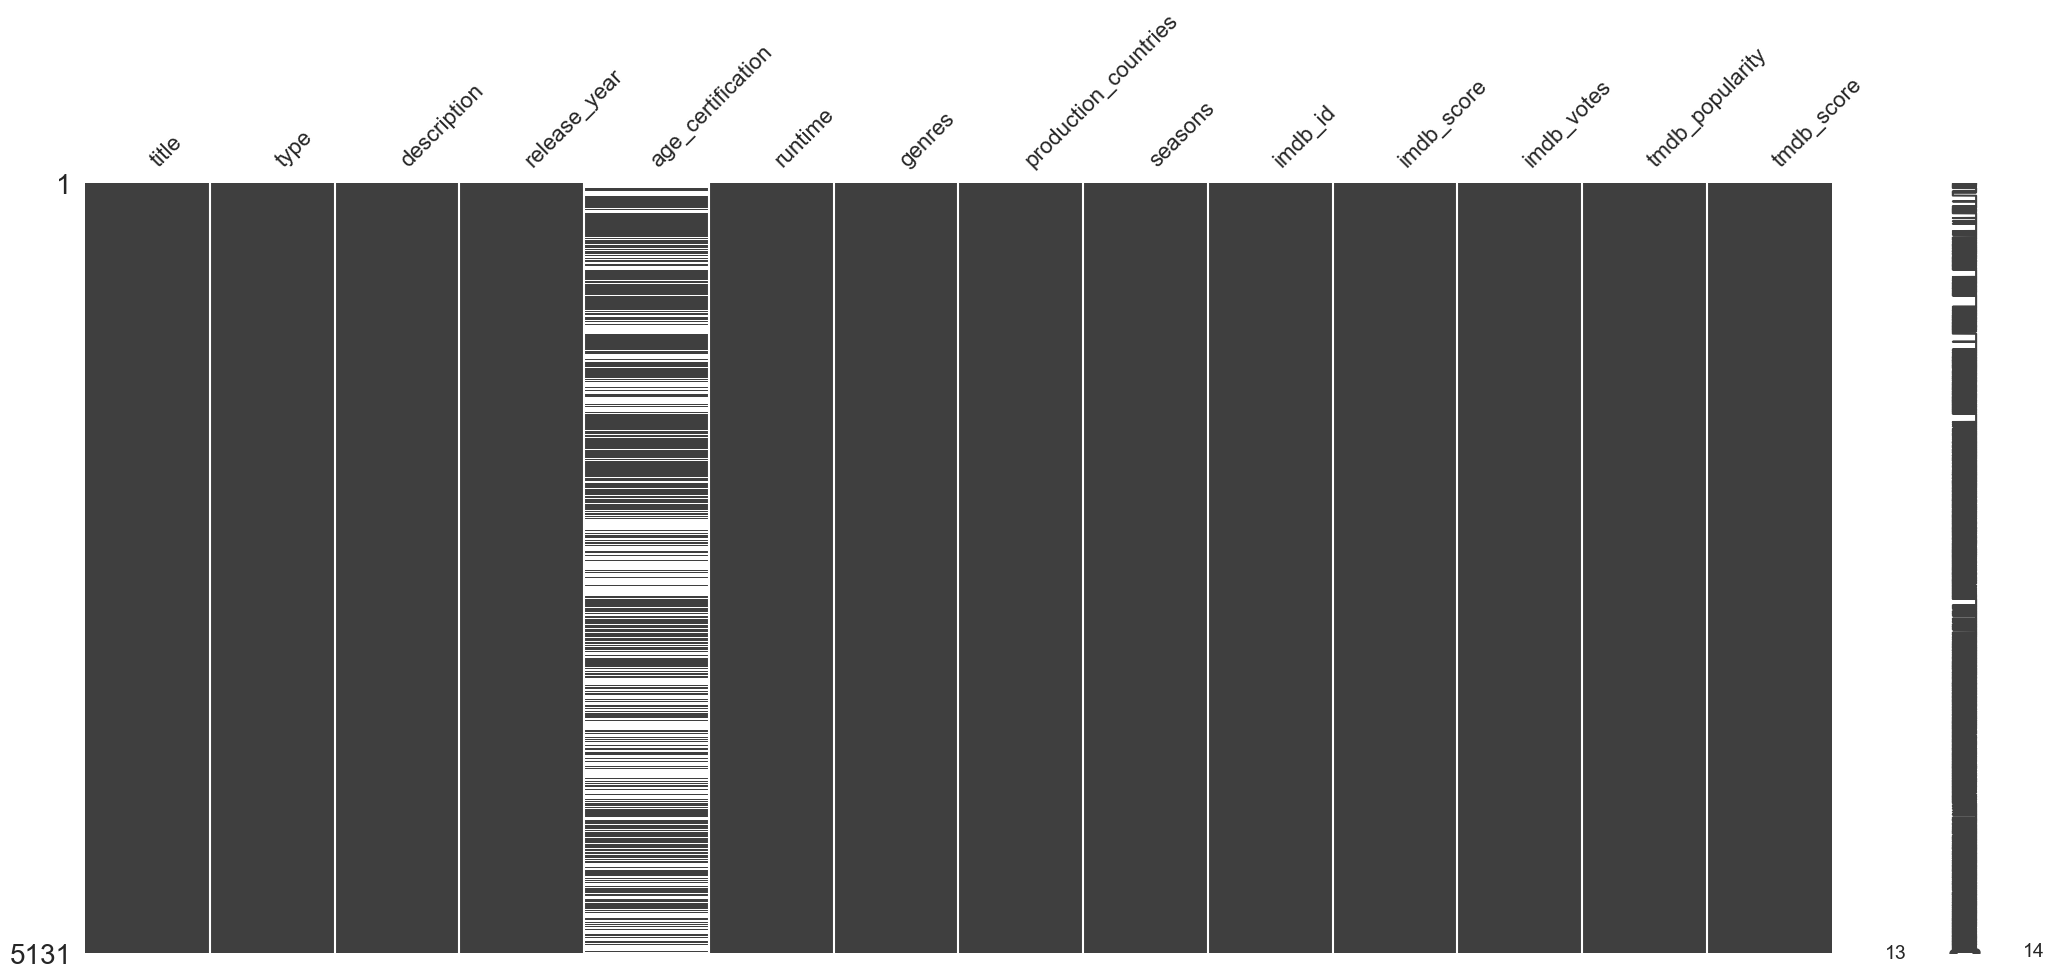

In [87]:
df_title_cleaned =df_titles.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
msno.matrix(df_title_cleaned)

In [88]:
df_title_cleaned.isnull().sum()

title                      0
type                       0
description                2
release_year               0
age_certification       2189
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

# SHOW

In [89]:
df_title_cleaned_SHOW = df_title_cleaned[df_title_cleaned.type == 'SHOW']
df_titles_float_field = df_title_cleaned_SHOW[['release_year', 'runtime', 'seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
df_titles_float_field.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,
ts22164,1969,30,4.0,8.8,73424.0,17.617,8.306
ts45948,1972,43,1.0,8.1,2151.0,1.487,7.000
ts20681,1989,24,9.0,8.9,308824.0,130.213,8.301
ts22082,1982,51,4.0,6.9,34115.0,50.267,7.500
ts21715,1984,10,24.0,6.5,5104.0,42.196,6.500


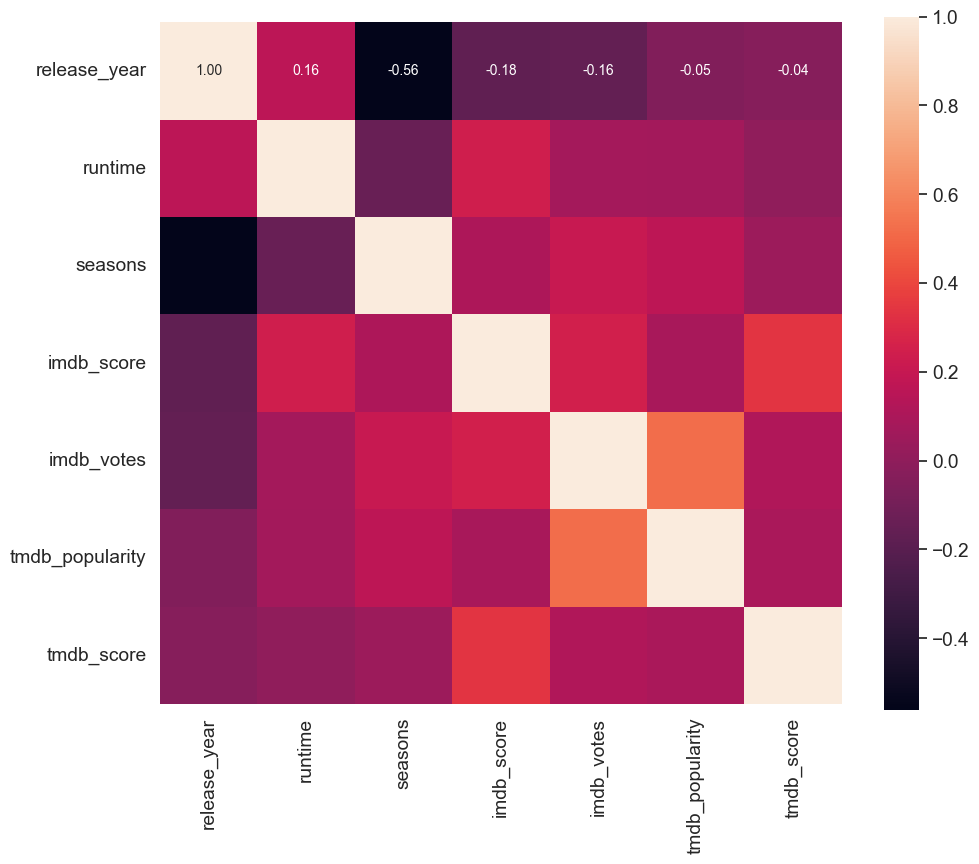

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df):
    corrmat_shows= df.corr()

    sns.set(font_scale=1.25)

    f, ax = plt.subplots(figsize=(11,9))

    hm_shows= sns.heatmap(corrmat_shows,cbar=True, annot=True, square=True, fmt= ".2f", annot_kws={"size":10,},yticklabels= corrmat_shows.index, xticklabels=corrmat_shows.index)

    plt.show()

plot_correlation(df_titles_float_field)

# MOVIE


In [94]:
df_title_cleaned_MOVIE = df_title_cleaned[df_title_cleaned.type == 'MOVIE']
df_titles_float_field_MOVIE = df_title_cleaned_MOVIE[['release_year', 'runtime','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
df_titles_float_field_MOVIE.head()


,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,
tm84618,1976,114,8.2,808582.0,40.965,8.179
tm154986,1972,109,7.7,107673.0,10.010,7.300
tm127384,1975,91,8.2,534486.0,15.461,7.811
tm120801,1967,150,7.7,72662.0,20.398,7.600
tm70993,1979,94,8.0,395024.0,17.770,7.800


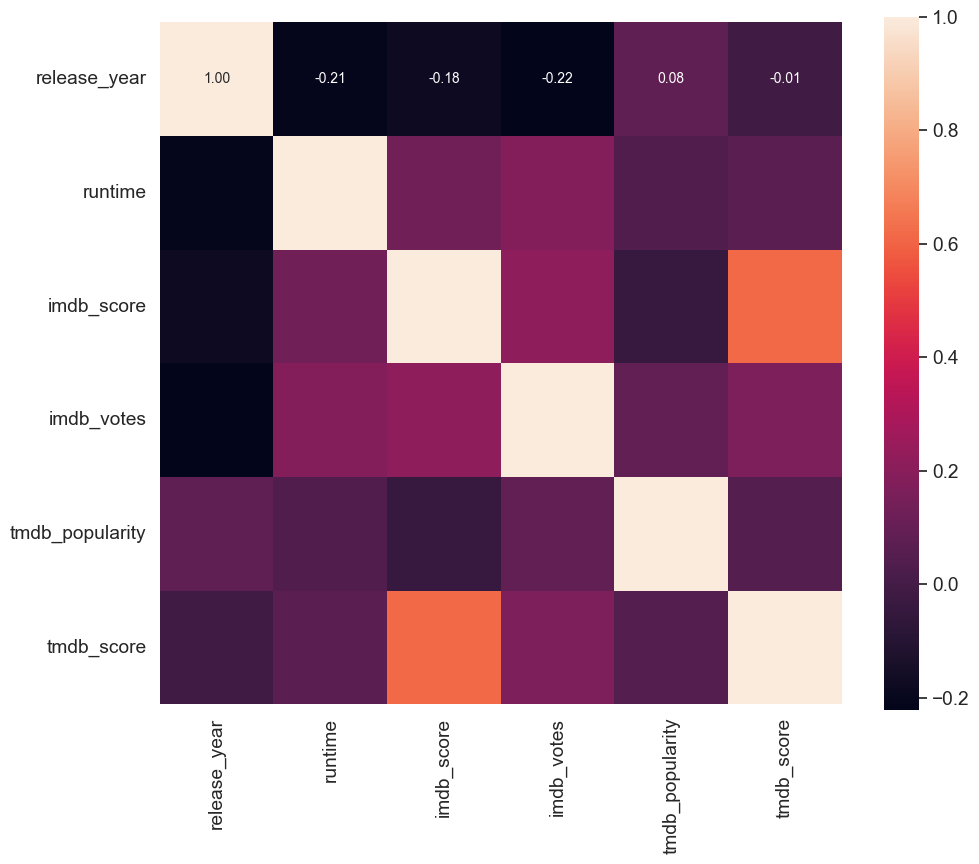

In [95]:
plot_correlation(df_titles_float_field_MOVIE)

## clustering

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/6d/6m0dtsyx56x4_52jfjd5_vh80000gn/T/ipykernel_66381/2937548885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles_float_field_MOVIE['cluster'] = clusters
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seab

<Axes: xlabel='imdb_score', ylabel='tmdb_score'>

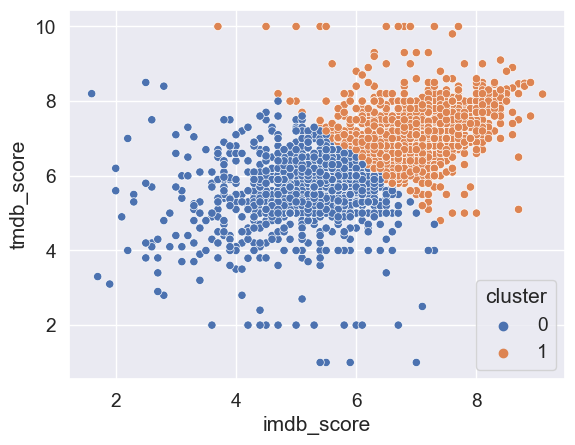

In [100]:
## clustering with sklearn
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2, random_state=0).fit_predict(df_titles_float_field_MOVIE[['imdb_score', 'tmdb_score']])

df_titles_float_field_MOVIE['cluster'] = clusters

sns.scatterplot(x='imdb_score', y='tmdb_score', hue='cluster', data=df_titles_float_field_MOVIE)


/var/folders/6d/6m0dtsyx56x4_52jfjd5_vh80000gn/T/ipykernel_66381/4216468608.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_cleaned['clusters'] = clusters
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='imdb_score', ylabel='tmdb_score'>

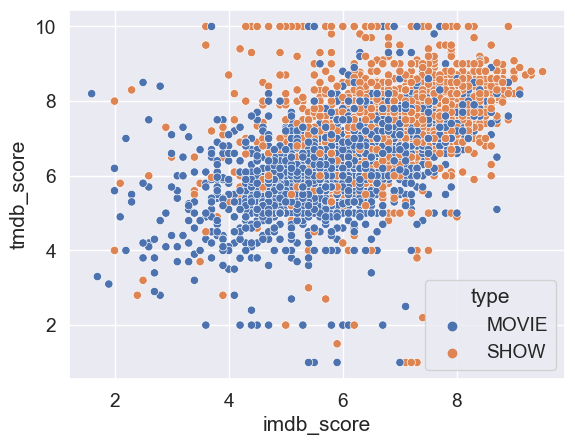

In [104]:
# Lets import GMM from sklearn
from sklearn.mixture import BayesianGaussianMixture

df_title_cleaned[['type','imdb_score', 'tmdb_score']]
# Lets try to cluster the first dataset
model = BayesianGaussianMixture(covariance_type='tied', n_components=2)
# normalized_df[['weight', 'diameter']]
clusters = model.fit_predict(df_title_cleaned[['imdb_score', 'tmdb_score']])
df_title_cleaned['clusters'] = clusters
sns.scatterplot(x='imdb_score', y='tmdb_score', hue='type', data=df_title_cleaned)